# Assignment - Linear Regression - Part 1

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

1) Which variables are significant in predicting the price of a car

2) How well those variables describe the price of a car


## Business Goal

Model the price of cars with the available independent variables - enabling company to accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels, and to understand the pricing dynamics of a new market.

### Step 1. Importing and Understanding Data

In [1555]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1556]:
#Read the csv file into dataframe 'car_data'
car_data = pd.read_csv('CarPrice_Assignment.csv')
car_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [1557]:
# Check the dataframe information
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Step 2. Data Preparation

a) Clean 'CarName' column

b) Create dummy variables - fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem

Assumption - Omitting variable 'enginelocation' for anlysis as most of the cases are 'front' (Only 3 rows with 'rear' value). Omitting variable 'CarName' as it does not seem imp parameter in the given scenario

In [1558]:
# Remove the car-model and keep only company name
car_data['CarName']=car_data['CarName'].str.lower().apply(lambda x: x.split(" ")[0])
car_data.head()

car_ID  symboling      CarName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase   ...     enginesize  fuelsystem  \
0        rwd          front       88.6   ...            130        mpfi   
1        rwd          front       88.6   ...            130        mpfi   
2        rwd          front       94.5   ...            152        mpfi   
3        fwd          front       99.8   ...            109        mpfi   
4        4wd          front       99.4   ...            136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [1559]:
car_data['CarName'].value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
maxda           2
renault         2
toyouta         1
mercury         1
porcshce        1
vokswagen       1
Name: CarName, dtype: int64

In [1560]:
# Replace some of the incorrect car company names with correct names
car_data['CarName'].replace('porcshce','porsche',inplace=True)
# Assumed 'vw' meant 'volkswagen'
car_data['CarName'].replace(['vw','vokswagen'],'volkswagen',inplace=True)
car_data['CarName'].replace('toyouta','toyota',inplace=True)
# Assumed 'maxda' meant 'mazda'
car_data['CarName'].replace('maxda','mazda',inplace=True)
car_data['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

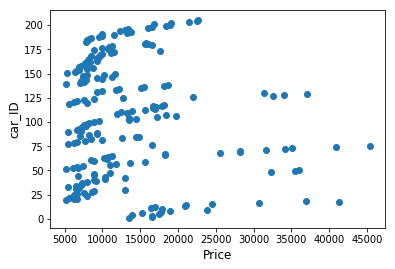

In [1561]:
#Do a scatter plot for price to see any outliers
fig = plt.figure()
plt.scatter(car_data.price,car_data.car_ID)
plt.xlabel('Price', fontsize=12)      # X-label
plt.ylabel('car_ID', fontsize=12)       # Y-label
plt.show()

In [1562]:
car_data['price'].describe([.8,.9,.95,.98])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
50%      10295.000000
80%      17493.800000
90%      22563.000000
95%      32472.400000
98%      36809.600000
max      45400.000000
Name: price, dtype: float64

In [1563]:
# Remove rows with price > 36000
car_data = car_data[car_data['price']<36809]
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 204
Data columns (total 26 columns):
car_ID              200 non-null int64
symboling           200 non-null int64
CarName             200 non-null object
fueltype            200 non-null object
aspiration          200 non-null object
doornumber          200 non-null object
carbody             200 non-null object
drivewheel          200 non-null object
enginelocation      200 non-null object
wheelbase           200 non-null float64
carlength           200 non-null float64
carwidth            200 non-null float64
carheight           200 non-null float64
curbweight          200 non-null int64
enginetype          200 non-null object
cylindernumber      200 non-null object
enginesize          200 non-null int64
fuelsystem          200 non-null object
boreratio           200 non-null float64
stroke              200 non-null float64
compressionratio    200 non-null float64
horsepower          200 non-null int64
peakrpm      

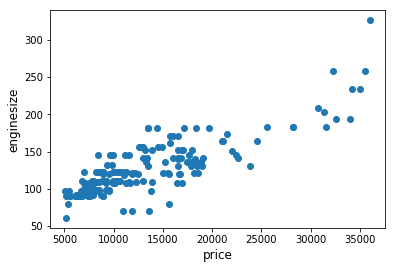

In [1564]:
# Scatter plot between price and engineprice to see the spread
fig = plt.figure()
plt.scatter(car_data.price,car_data.enginesize)
plt.xlabel('price', fontsize=12)                        # X-label
plt.ylabel('enginesize', fontsize=12)                   # Y-Label
plt.show()

In [1565]:
# describe details of enginesize variable
car_data.enginesize.describe()

count    200.000000
mean     123.960000
std       36.826749
min       61.000000
25%       97.000000
50%      110.500000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

#### Converting some of the column values from categorical to numerical by changing values to 1 and 0

In [1566]:
# Change 'fueltype', 'doornumber', 'aspiration' values to 1 and 0 as these columns contain only 2 types of values
# Change 'gas' to one and 'diesel' to 0
car_data['fueltype'] = car_data['fueltype'].map({'gas': 1, 'diesel': 0})
# Change 'four' to 1 and 'two' to 0
car_data['doornumber'] = car_data['doornumber'].map({'four': 1, 'two': 0})
# Change 'std' to 1 and 'turbo' to 0
car_data['aspiration'] = car_data['aspiration'].map({'std': 1, 'turbo': 0})
# Change the column names to reflect the meaning of variable appropriately
car_data=car_data.rename(columns={'fueltype':'fueltype_gas','doornumber':'door_four','aspiration':'aspiration_std'})
car_data.head()

car_ID  symboling      CarName  fueltype_gas  aspiration_std  door_four  \
0       1          3  alfa-romero             1               1          0   
1       2          3  alfa-romero             1               1          0   
2       3          1  alfa-romero             1               1          0   
3       4          2         audi             1               1          1   
4       5          2         audi             1               1          1   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [1567]:
# Check the value counts of the columns after changing the values to numeric
print(car_data['fueltype_gas'].value_counts())
print(car_data['door_four'].value_counts())
print(car_data['aspiration_std'].value_counts())

1    180
0     20
Name: fueltype_gas, dtype: int64
1    113
0     87
Name: door_four, dtype: int64
1    163
0     37
Name: aspiration_std, dtype: int64


In [1568]:
# Check the variable 'cylindernumber' and the level of different values it contains
print(car_data['cylindernumber'].value_counts())
print(car_data['fuelsystem'].value_counts())

four      159
six        21
five       11
two         4
eight       3
twelve      1
three       1
Name: cylindernumber, dtype: int64
mpfi    89
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [1569]:
# Remove the rows with values 'twelve' and 'three' as there are only one instance of these values
car_data = car_data[car_data['cylindernumber']!='twelve']
car_data = car_data[car_data['cylindernumber']!='three']
# Remove the rows with values 'spfi' and 'mfi' as there are only one instance of these values
car_data = car_data[car_data['fuelsystem']!='spfi']
car_data = car_data[car_data['fuelsystem']!='mfi']
     
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 204
Data columns (total 26 columns):
car_ID              196 non-null int64
symboling           196 non-null int64
CarName             196 non-null object
fueltype_gas        196 non-null int64
aspiration_std      196 non-null int64
door_four           196 non-null int64
carbody             196 non-null object
drivewheel          196 non-null object
enginelocation      196 non-null object
wheelbase           196 non-null float64
carlength           196 non-null float64
carwidth            196 non-null float64
carheight           196 non-null float64
curbweight          196 non-null int64
enginetype          196 non-null object
cylindernumber      196 non-null object
enginesize          196 non-null int64
fuelsystem          196 non-null object
boreratio           196 non-null float64
stroke              196 non-null float64
compressionratio    196 non-null float64
horsepower          196 non-null int64
peakrpm         

#### Creating dummies for some of the variables as they have multiple categorical values

In [1570]:
# Create a dummy variable for 'symboling' column
symboling_df = pd.get_dummies(car_data['symboling'])
# drop column '-2'
symboling_df=symboling_df.drop(-2, axis=1)
symboling_df.head()



-1   0   1   2   3
0   0   0   0   0   1
1   0   0   0   0   1
2   0   0   1   0   0
3   0   0   0   1   0
4   0   0   0   1   0

In [1571]:
#Rename the columns by adding prefix 'sbl_risk'
symboling_df=symboling_df.rename(columns={-1:'sbl_risk-1',0:'sbl_risk0',1:'sbl_risk1',2:'sbl_risk2',3:'sbl_risk3'})
symboling_df.head()

sbl_risk-1  sbl_risk0  sbl_risk1  sbl_risk2  sbl_risk3
0           0          0          0          0          1
1           0          0          0          0          1
2           0          0          1          0          0
3           0          0          0          1          0
4           0          0          0          1          0

In [1572]:
# concat symboling dataframe with car_data
car_data = pd.concat([car_data,symboling_df],axis=1)
car_data.head()

car_ID  symboling      CarName  fueltype_gas  aspiration_std  door_four  \
0       1          3  alfa-romero             1               1          0   
1       2          3  alfa-romero             1               1          0   
2       3          1  alfa-romero             1               1          0   
3       4          2         audi             1               1          1   
4       5          2         audi             1               1          1   

       carbody drivewheel enginelocation  wheelbase    ...      horsepower  \
0  convertible        rwd          front       88.6    ...             111   
1  convertible        rwd          front       88.6    ...             111   
2    hatchback        rwd          front       94.5    ...             154   
3        sedan        fwd          front       99.8    ...             102   
4        sedan        4wd          front       99.4    ...             115   

   peakrpm  citympg  highwaympg    price sbl_risk-1  sbl_risk0 sbl_risk1  \
0     5000       21          27  13495.0          0          0         0   
1     5000       21          27  16500.0          0          0         0   
2     5000       19          26  16500.0          0          0         1   
3     5500       24          30  13950.0          0          0         0   
4     5500       18          22  17450.0          0          0         0   

   sbl_risk2  sbl_risk3  
0          0          1  
1          0          1  
2          0          0  
3          1          0  
4          1          0  

[5 rows x 31 columns]

In [1573]:
# Dropping 'symboling' as we have created the dummies for it
car_data.drop(['symboling'],axis=1,inplace=True)

In [1574]:
# Creating a dummy variable for 'carbody' column
carbody_df = pd.get_dummies(car_data['carbody'],drop_first=True)
carbody_df.head()

hardtop  hatchback  sedan  wagon
0        0          0      0      0
1        0          0      0      0
2        0          1      0      0
3        0          0      1      0
4        0          0      1      0

In [1575]:
# concat carbody with car_data
car_data = pd.concat([car_data,carbody_df],axis=1)
car_data.drop(['carbody'],axis=1,inplace=True)
car_data.head()


car_ID      CarName  fueltype_gas  aspiration_std  door_four drivewheel  \
0       1  alfa-romero             1               1          0        rwd   
1       2  alfa-romero             1               1          0        rwd   
2       3  alfa-romero             1               1          0        rwd   
3       4         audi             1               1          1        fwd   
4       5         audi             1               1          1        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...      price  sbl_risk-1  \
0          front       88.6      168.8      64.1  ...    13495.0           0   
1          front       88.6      168.8      64.1  ...    16500.0           0   
2          front       94.5      171.2      65.5  ...    16500.0           0   
3          front       99.8      176.6      66.2  ...    13950.0           0   
4          front       99.4      176.6      66.4  ...    17450.0           0   

  sbl_risk0 sbl_risk1  sbl_risk2 sbl_risk3  hardtop  hatchback  sedan  wagon  
0         0         0          0         1        0          0      0      0  
1         0         0          0         1        0          0      0      0  
2         0         1          0         0        0          1      0      0  
3         0         0          1         0        0          0      1      0  
4         0         0          1         0        0          0      1      0  

[5 rows x 33 columns]

In [1576]:
# Create  dummy variable for 'drivewheel' column
drivewheel_df = pd.get_dummies(car_data['drivewheel'],drop_first=True)
drivewheel_df.head()

fwd  rwd
0    0    1
1    0    1
2    0    1
3    1    0
4    0    0

In [1577]:
# concat driveheel with car_data
car_data = pd.concat([car_data,drivewheel_df],axis=1)
# drop drivewheel from car_data
car_data.drop(['drivewheel'],axis=1,inplace=True)
car_data.head()

car_ID      CarName  fueltype_gas  aspiration_std  door_four  \
0       1  alfa-romero             1               1          0   
1       2  alfa-romero             1               1          0   
2       3  alfa-romero             1               1          0   
3       4         audi             1               1          1   
4       5         audi             1               1          1   

  enginelocation  wheelbase  carlength  carwidth  carheight ...   sbl_risk0  \
0          front       88.6      168.8      64.1       48.8 ...           0   
1          front       88.6      168.8      64.1       48.8 ...           0   
2          front       94.5      171.2      65.5       52.4 ...           0   
3          front       99.8      176.6      66.2       54.3 ...           0   
4          front       99.4      176.6      66.4       54.3 ...           0   

  sbl_risk1 sbl_risk2  sbl_risk3 hardtop  hatchback  sedan  wagon  fwd  rwd  
0         0         0          1       0          0      0      0    0    1  
1         0         0          1       0          0      0      0    0    1  
2         1         0          0       0          1      0      0    0    1  
3         0         1          0       0          0      1      0    1    0  
4         0         1          0       0          0      1      0    0    0  

[5 rows x 34 columns]

In [1578]:
# Create a dummy variable for 'enginetype' column
enginetype_df = pd.get_dummies(car_data['enginetype'])
# Drop enginetype column from car_data
enginetype_df=enginetype_df.drop('dohcv', axis =1)
enginetype_df.head()


dohc  l  ohc  ohcf  ohcv  rotor
0     1  0    0     0     0      0
1     1  0    0     0     0      0
2     0  0    0     0     1      0
3     0  0    1     0     0      0
4     0  0    1     0     0      0

In [1579]:
# Rename the column names of enginetype_df
enginetype_df=enginetype_df.rename(columns={'dohc':'entyp_dohc','l':'entyp_l','ohc':'entyp_ohc','ohcf':'entyp_ohcf',
                                            'ohcv':'entyp_ohcv','rotor':'entyp_rotor'})
# Concat enginetype_df with car_data
car_data = pd.concat([car_data,enginetype_df],axis=1)
# drop enginetype column from car_data
car_data.drop(['enginetype'],axis=1,inplace=True)
car_data.head()

car_ID      CarName  fueltype_gas  aspiration_std  door_four  \
0       1  alfa-romero             1               1          0   
1       2  alfa-romero             1               1          0   
2       3  alfa-romero             1               1          0   
3       4         audi             1               1          1   
4       5         audi             1               1          1   

  enginelocation  wheelbase  carlength  carwidth  carheight     ...       \
0          front       88.6      168.8      64.1       48.8     ...        
1          front       88.6      168.8      64.1       48.8     ...        
2          front       94.5      171.2      65.5       52.4     ...        
3          front       99.8      176.6      66.2       54.3     ...        
4          front       99.4      176.6      66.4       54.3     ...        

   sedan wagon  fwd rwd  entyp_dohc  entyp_l  entyp_ohc  entyp_ohcf  \
0      0     0    0   1           1        0          0           0   
1      0     0    0   1           1        0          0           0   
2      0     0    0   1           0        0          0           0   
3      1     0    1   0           0        0          1           0   
4      1     0    0   0           0        0          1           0   

   entyp_ohcv  entyp_rotor  
0           0            0  
1           0            0  
2           1            0  
3           0            0  
4           0            0  

[5 rows x 39 columns]

In [1580]:
# Create dummy for 'cylindernumber' column
cylindernumber_df = pd.get_dummies(car_data['cylindernumber'], drop_first=True)
# Rename the column names of cylindernumber_df
cylindernumber_df=cylindernumber_df.rename(columns={'five':'cylnb_5','four':'cylnb_4','six':'cylnb_6',
                                                    'two':'cylnb_2'})
# concat cylindernumber_df with car_data
car_data = pd.concat([car_data,cylindernumber_df],axis=1)
# drop cylindernumber column from car_data
car_data.drop(['cylindernumber'],axis=1,inplace=True)
car_data.head()


car_ID      CarName  fueltype_gas  aspiration_std  door_four  \
0       1  alfa-romero             1               1          0   
1       2  alfa-romero             1               1          0   
2       3  alfa-romero             1               1          0   
3       4         audi             1               1          1   
4       5         audi             1               1          1   

  enginelocation  wheelbase  carlength  carwidth  carheight   ...     \
0          front       88.6      168.8      64.1       48.8   ...      
1          front       88.6      168.8      64.1       48.8   ...      
2          front       94.5      171.2      65.5       52.4   ...      
3          front       99.8      176.6      66.2       54.3   ...      
4          front       99.4      176.6      66.4       54.3   ...      

   entyp_dohc  entyp_l entyp_ohc  entyp_ohcf  entyp_ohcv  entyp_rotor  \
0           1        0         0           0           0            0   
1           1        0         0           0           0            0   
2           0        0         0           0           1            0   
3           0        0         1           0           0            0   
4           0        0         1           0           0            0   

   cylnb_5  cylnb_4  cylnb_6  cylnb_2  
0        0        1        0        0  
1        0        1        0        0  
2        0        0        1        0  
3        0        1        0        0  
4        1        0        0        0  

[5 rows x 42 columns]

In [1581]:
# Create a dummy variable for 'fuelsystem' column
fuelsystem_df = pd.get_dummies(car_data['fuelsystem'])
fuelsystem_df=fuelsystem_df.drop('4bbl',axis=1)
# rename the column names for fuelsystem_df
fuelsystem_df=fuelsystem_df.rename(columns={'1bbl':'flsys_1bbl','2bbl':'flsys_2bbl','idi':'flsys_idi',
                                            'mpfi':'flsys_mpfi','spdi':'flsys_spdi'})
# concat fuelsystem_df with car_data
car_data = pd.concat([car_data,fuelsystem_df],axis=1)
# drop fuelsystem column from car_data
car_data=car_data.drop(['fuelsystem'],axis=1)
car_data.head()


car_ID      CarName  fueltype_gas  aspiration_std  door_four  \
0       1  alfa-romero             1               1          0   
1       2  alfa-romero             1               1          0   
2       3  alfa-romero             1               1          0   
3       4         audi             1               1          1   
4       5         audi             1               1          1   

  enginelocation  wheelbase  carlength  carwidth  carheight     ...      \
0          front       88.6      168.8      64.1       48.8     ...       
1          front       88.6      168.8      64.1       48.8     ...       
2          front       94.5      171.2      65.5       52.4     ...       
3          front       99.8      176.6      66.2       54.3     ...       
4          front       99.4      176.6      66.4       54.3     ...       

   entyp_rotor  cylnb_5  cylnb_4  cylnb_6  cylnb_2  flsys_1bbl  flsys_2bbl  \
0            0        0        1        0        0           0           0   
1            0        0        1        0        0           0           0   
2            0        0        0        1        0           0           0   
3            0        0        1        0        0           0           0   
4            0        1        0        0        0           0           0   

   flsys_idi  flsys_mpfi  flsys_spdi  
0          0           1           0  
1          0           1           0  
2          0           1           0  
3          0           1           0  
4          0           1           0  

[5 rows x 46 columns]

In [1582]:
# Remove 'CarName' and ' enginelocation' columns as may not be significant variable in analysis
car_data=car_data.drop(['CarName','enginelocation','car_ID'], axis=1)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 204
Data columns (total 43 columns):
fueltype_gas        196 non-null int64
aspiration_std      196 non-null int64
door_four           196 non-null int64
wheelbase           196 non-null float64
carlength           196 non-null float64
carwidth            196 non-null float64
carheight           196 non-null float64
curbweight          196 non-null int64
enginesize          196 non-null int64
boreratio           196 non-null float64
stroke              196 non-null float64
compressionratio    196 non-null float64
horsepower          196 non-null int64
peakrpm             196 non-null int64
citympg             196 non-null int64
highwaympg          196 non-null int64
price               196 non-null float64
sbl_risk-1          196 non-null uint8
sbl_risk0           196 non-null uint8
sbl_risk1           196 non-null uint8
sbl_risk2           196 non-null uint8
sbl_risk3           196 non-null uint8
hardtop             1

In [1588]:
# describe the car_data
car_data.describe()

fueltype_gas  aspiration_std   door_four   wheelbase   carlength  \
count    196.000000      196.000000  196.000000  196.000000  196.000000   
mean       0.897959        0.816327    0.576531   98.606633  173.645408   
std        0.303477        0.388209    0.495374    5.710603   11.741495   
min        0.000000        0.000000    0.000000   86.600000  144.600000   
25%        1.000000        1.000000    0.000000   94.500000  166.300000   
50%        1.000000        1.000000    1.000000   96.950000  173.100000   
75%        1.000000        1.000000    1.000000  101.200000  180.600000   
max        1.000000        1.000000    1.000000  115.600000  202.600000   

         carwidth   carheight   curbweight  enginesize   boreratio  \
count  196.000000  196.000000   196.000000  196.000000  196.000000   
mean    65.822449   53.761735  2528.612245  123.112245    3.319082   
std      2.003665    2.419751   491.933540   33.885897    0.266601   
min     61.800000   48.800000  1713.000000   70.000000    2.540000   
25%     64.000000   52.000000  2143.750000   97.000000    3.150000   
50%     65.500000   54.100000  2407.500000  110.000000    3.310000   
75%     66.500000   55.500000  2914.250000  141.000000    3.580000   
max     72.300000   59.800000  4066.000000  258.000000    3.940000   

          ...      entyp_rotor     cylnb_5     cylnb_4     cylnb_6  \
count     ...       196.000000  196.000000  196.000000  196.000000   
mean      ...         0.020408    0.056122    0.801020    0.107143   
std       ...         0.141754    0.230747    0.400255    0.310087   
min       ...         0.000000    0.000000    0.000000    0.000000   
25%       ...         0.000000    0.000000    1.000000    0.000000   
50%       ...         0.000000    0.000000    1.000000    0.000000   
75%       ...         0.000000    0.000000    1.000000    0.000000   
max       ...         1.000000    1.000000    1.000000    1.000000   

          cylnb_2  flsys_1bbl  flsys_2bbl   flsys_idi  flsys_mpfi  flsys_spdi  
count  196.000000  196.000000  196.000000  196.000000  196.000000  196.000000  
mean     0.020408    0.056122    0.331633    0.102041    0.448980    0.045918  
std      0.141754    0.230747    0.472005    0.303477    0.498664    0.209844  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000    0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 43 columns]

### Step3. Standardize data

In [1589]:
#defining a standardization function to standardize the values of car_data
def standardize (x): 
    return ((x-np.mean(x))/(np.std(x)))
                                             
                                              
# applying standardize function to all columns of car_data
car_data = car_data.apply(standardize)
car_data.describe()

fueltype_gas  aspiration_std     door_four     wheelbase     carlength  \
count  1.960000e+02    1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean  -1.883414e-16   -2.265761e-17 -3.092764e-16 -7.631084e-15 -6.908306e-15   
std    1.002561e+00    1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00   
min   -2.966479e+00   -2.108185e+00 -1.166810e+00 -2.107900e+00 -2.480075e+00   
25%    3.370999e-01    4.743416e-01 -1.166810e+00 -7.209658e-01 -6.271960e-01   
50%    3.370999e-01    4.743416e-01  8.570375e-01 -2.908406e-01 -4.657029e-02   
75%    3.370999e-01    4.743416e-01  8.570375e-01  4.552950e-01  5.938257e-01   
max    3.370999e-01    4.743416e-01  8.570375e-01  2.983378e+00  2.472321e+00   

           carwidth     carheight    curbweight    enginesize     boreratio  \
count  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean   1.296695e-14 -2.001574e-14  2.809544e-16 -1.059243e-16  6.344132e-17   
std    1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00   
min   -2.012687e+00 -2.055766e+00 -1.662218e+00 -1.571399e+00 -2.929760e+00   
25%   -9.118870e-01 -7.299289e-01 -7.843495e-01 -7.725666e-01 -6.358365e-01   
50%   -1.613417e-01  1.401514e-01 -2.468268e-01 -3.879438e-01 -3.415175e-02   
75%    3.390218e-01  7.202050e-01  7.859300e-01  5.292338e-01  9.811912e-01   
max    3.241130e+00  2.501798e+00  3.133197e+00  3.990840e+00  2.334982e+00   

           ...        entyp_rotor       cylnb_5       cylnb_4       cylnb_6  \
count      ...       1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean       ...       2.939825e-16  5.046983e-16 -2.673598e-16  7.675266e-17   
std        ...       1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00   
min        ...      -1.443376e-01 -2.438431e-01 -2.006400e+00 -3.464102e-01   
25%        ...      -1.443376e-01 -2.438431e-01  4.984051e-01 -3.464102e-01   
50%        ...      -1.443376e-01 -2.438431e-01  4.984051e-01 -3.464102e-01   
75%        ...      -1.443376e-01 -2.438431e-01  4.984051e-01 -3.464102e-01   
max        ...       6.928203e+00  4.100998e+00  4.984051e-01  2.886751e+00   

            cylnb_2    flsys_1bbl    flsys_2bbl     flsys_idi    flsys_mpfi  \
count  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean   2.939825e-16  5.616256e-16 -5.890979e-17 -1.203686e-16 -5.698390e-16   
std    1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00  1.002561e+00   
min   -1.443376e-01 -2.438431e-01 -7.044027e-01 -3.370999e-01 -9.026709e-01   
25%   -1.443376e-01 -2.438431e-01 -7.044027e-01 -3.370999e-01 -9.026709e-01   
50%   -1.443376e-01 -2.438431e-01 -7.044027e-01 -3.370999e-01 -9.026709e-01   
75%   -1.443376e-01 -2.438431e-01  1.419642e+00 -3.370999e-01  1.107823e+00   
max    6.928203e+00  4.100998e+00  1.419642e+00  2.966479e+00  1.107823e+00   

         flsys_spdi  
count  1.960000e+02  
mean   3.679030e-16  
std    1.002561e+00  
min   -2.193817e-01  
25%   -2.193817e-01  
50%   -2.193817e-01  
75%   -2.193817e-01  
max    4.558265e+00  

[8 rows x 43 columns]

### Step 4. Splitting Data into Training and Testing Sets

In [1590]:
car_data.columns

Index(['fueltype_gas', 'aspiration_std', 'door_four', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'sbl_risk-1', 'sbl_risk0', 'sbl_risk1',
       'sbl_risk2', 'sbl_risk3', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'entyp_dohc', 'entyp_l', 'entyp_ohc', 'entyp_ohcf',
       'entyp_ohcv', 'entyp_rotor', 'cylnb_5', 'cylnb_4', 'cylnb_6', 'cylnb_2',
       'flsys_1bbl', 'flsys_2bbl', 'flsys_idi', 'flsys_mpfi', 'flsys_spdi'],
      dtype='object')

In [1591]:
# Put feature variable to X

X = car_data[['fueltype_gas', 'aspiration_std', 'door_four', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'sbl_risk-1', 'sbl_risk0',
       'sbl_risk1', 'sbl_risk2', 'sbl_risk3', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'entyp_dohc', 'entyp_l', 'entyp_ohc',
       'entyp_ohcf', 'entyp_ohcv', 'entyp_rotor', 'cylnb_5', 'cylnb_4',
       'cylnb_6', 'cylnb_2', 'flsys_1bbl', 'flsys_2bbl', 'flsys_idi',
       'flsys_mpfi', 'flsys_spdi']]

# Put response variable to y
y = car_data['price']


In [1592]:
#Split the date in 70/30 for training and testing 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

### Step 5. Building a Linear Model

In [1593]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Add a constant column to our dataframe
# create a first fitted model including all the independent variables
lm_1 = sm.OLS(y_train,X_train).fit()

In [1594]:
#Check the summary of the 1st linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     43.49
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           2.00e-46
Time:                        20:46:21   Log-Likelihood:                 12.963
No. Observations:                 137   AIC:                             54.07
Df Residuals:                      97   BIC:                             170.9
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0420      0.025  

### Step 6. Checking VIF

In [1597]:
# Define function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [1598]:
# Calculate Vif value
vif_cal(input_data=car_data, dependent_col="price")

C:\Users\eta7moq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
0       fueltype_gas         inf
39         flsys_idi         inf
32       entyp_rotor         inf
36           cylnb_2         inf
11  compressionratio  199.760000
29         entyp_ohc  174.150000
40        flsys_mpfi   69.040000
38        flsys_2bbl   62.870000
34           cylnb_4   60.420000
30        entyp_ohcf   55.910000
28           entyp_l   54.250000
27        entyp_dohc   50.510000
8         enginesize   41.020000
31        entyp_ohcv   38.090000
7         curbweight   35.250000
14           citympg   34.430000
15        highwaympg   31.730000
12        horsepower   25.070000
23             sedan   21.950000
35           cylnb_6   20.530000
18         sbl_risk1   19.390000
17         sbl_risk0   19.310000
22         hatchback   16.780000
37        flsys_1bbl   16.460000
33           cylnb_5   16.120000
26               rwd   14.820000
3          wheelbase   14.470000
4          carlength   14.380000
41        flsys_spdi   14.150000
20         sbl_risk3   13.780000
19         sbl_risk2   12.790000
24             wagon   11.270000
25               fwd   11.240000
5           carwidth   10.750000
16        sbl_risk-1    8.840000
9          boreratio    7.750000
1     aspiration_std    5.110000
21           hardtop    4.000000
6          carheight    3.900000
10            stroke    3.800000
13           peakrpm    3.720000
2          door_four    3.710000

### Step 7. Optimize model by eliminating variables based on p value, VIF, and correlation matrix

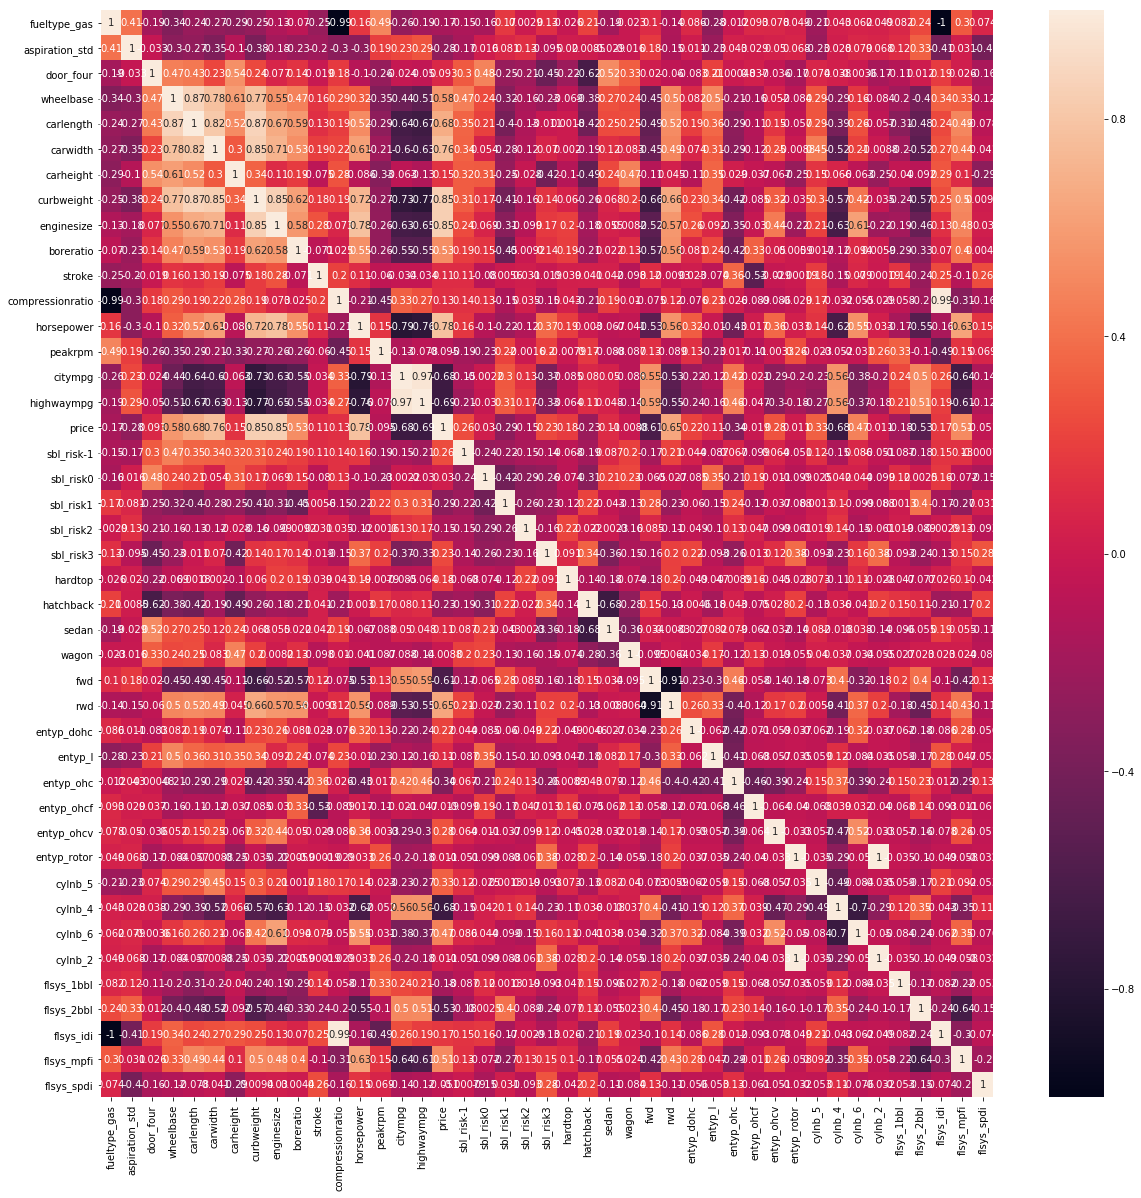

In [1599]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))     # Size of the figure
sns.heatmap(car_data.corr(),annot = True)

In [1600]:
# Lets start looking at the 'compressionratio' variable - 
# It  has p valie of 0.536 and VIF of 202

# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('compressionratio',  1)

In [1601]:
# Create a 2nd fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [1602]:
#Summary of 2nd linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     44.91
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           3.57e-47
Time:                        21:19:07   Log-Likelihood:                 12.692
No. Observations:                 137   AIC:                             52.62
Df Residuals:                      98   BIC:                             166.5
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0407      0.025     -1.

In [1603]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['compressionratio'], axis=1), dependent_col="price")

C:\Users\eta7moq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
0     fueltype_gas         inf
35         cylnb_2         inf
38       flsys_idi         inf
31     entyp_rotor         inf
28       entyp_ohc  163.710000
39      flsys_mpfi   68.700000
37      flsys_2bbl   62.540000
33         cylnb_4   60.380000
29      entyp_ohcf   52.260000
27         entyp_l   48.270000
26      entyp_dohc   47.720000
8       enginesize   39.600000
30      entyp_ohcv   35.250000
7       curbweight   34.630000
13         citympg   32.630000
14      highwaympg   31.560000
11      horsepower   24.350000
22           sedan   21.950000
34         cylnb_6   19.970000
17       sbl_risk1   19.330000
16       sbl_risk0   19.310000
21       hatchback   16.780000
36      flsys_1bbl   16.330000
32         cylnb_5   15.950000
3        wheelbase   14.320000
25             rwd   14.230000
4        carlength   14.150000
40      flsys_spdi   14.050000
19       sbl_risk3   13.630000
18       sbl_risk2   12.550000
23           wagon   11.260000
24             fwd   10.890000
5         carwidth   10.400000
15      sbl_risk-1    8.810000
9        boreratio    7.680000
1   aspiration_std    4.690000
6        carheight    3.900000
20         hardtop    3.860000
10          stroke    3.710000
2        door_four    3.660000
12         peakrpm    3.410000

In [1604]:
# Looking at 'entyp_ohc' - both p value and VFI are very high.

X_train = X_train.drop('entyp_ohc', 1)

In [1606]:
# Create a 3rd fitted model
lm_3 = sm.OLS(y_train,X_train).fit()

In [1607]:
# Summary of 3rd linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     46.58
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           5.24e-48
Time:                        21:20:45   Log-Likelihood:                 12.674
No. Observations:                 137   AIC:                             50.65
Df Residuals:                      99   BIC:                             161.6
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0414      0.024     -1.

In [1608]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['compressionratio','entyp_ohc'], axis=1), dependent_col="price")

C:\Users\eta7moq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
0     fueltype_gas        inf
37       flsys_idi        inf
30     entyp_rotor        inf
34         cylnb_2        inf
38      flsys_mpfi  67.600000
36      flsys_2bbl  62.140000
32         cylnb_4  44.770000
7       curbweight  34.430000
8       enginesize  33.850000
13         citympg  32.470000
14      highwaympg  31.300000
22           sedan  21.950000
16       sbl_risk0  19.280000
17       sbl_risk1  19.280000
21       hatchback  16.780000
11      horsepower  16.610000
35      flsys_1bbl  16.250000
3        wheelbase  14.300000
25             rwd  13.950000
39      flsys_spdi  13.940000
4        carlength  13.680000
33         cylnb_6  13.670000
19       sbl_risk3  13.550000
18       sbl_risk2  12.540000
23           wagon  11.210000
31         cylnb_5  11.070000
24             fwd  10.880000
5         carwidth  10.250000
15      sbl_risk-1   8.810000
9        boreratio   7.130000
1   aspiration_std   3.850000
20         hardtop   3.840000
6        carheight   3.830000
28      entyp_ohcf   3.780000
10          stroke   3.710000
2        door_four   3.640000
12         peakrpm   3.270000
27         entyp_l   2.760000
29      entyp_ohcv   2.660000
26      entyp_dohc   1.920000

In [1609]:
# lconsider removing fcylnb_2, having both p value and IVF value high
X_train = X_train.drop('cylnb_2', 1)

In [1610]:
# Create a 4th fitted model
lm_4 = sm.OLS(y_train,X_train).fit()
#summary of 4th linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     46.58
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           5.24e-48
Time:                        21:22:50   Log-Likelihood:                 12.674
No. Observations:                 137   AIC:                             50.65
Df Residuals:                      99   BIC:                             161.6
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0414      0.024     -1.

In [1611]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['compressionratio','entyp_ohc','cylnb_2'], axis=1), dependent_col="price")

C:\Users\eta7moq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
0     fueltype_gas        inf
36       flsys_idi        inf
37      flsys_mpfi  67.600000
35      flsys_2bbl  62.140000
32         cylnb_4  44.770000
7       curbweight  34.430000
8       enginesize  33.850000
13         citympg  32.470000
14      highwaympg  31.300000
22           sedan  21.950000
17       sbl_risk1  19.280000
16       sbl_risk0  19.280000
21       hatchback  16.780000
11      horsepower  16.610000
34      flsys_1bbl  16.250000
3        wheelbase  14.300000
25             rwd  13.950000
38      flsys_spdi  13.940000
4        carlength  13.680000
33         cylnb_6  13.670000
19       sbl_risk3  13.550000
30     entyp_rotor  13.330000
18       sbl_risk2  12.540000
23           wagon  11.210000
31         cylnb_5  11.070000
24             fwd  10.880000
5         carwidth  10.250000
15      sbl_risk-1   8.810000
9        boreratio   7.130000
1   aspiration_std   3.850000
20         hardtop   3.840000
6        carheight   3.830000
28      entyp_ohcf   3.780000
10          stroke   3.710000
2        door_four   3.640000
12         peakrpm   3.270000
27         entyp_l   2.760000
29      entyp_ohcv   2.660000
26      entyp_dohc   1.920000

In [1612]:
# Next eliminate flsys_2bbl having both high p and VFI values
X_train = X_train.drop('flsys_2bbl', 1)
# Create a 5th fitted model
lm_5 = sm.OLS(y_train,X_train).fit()
#Summary of 5th linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     46.58
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           5.24e-48
Time:                        21:24:06   Log-Likelihood:                 12.674
No. Observations:                 137   AIC:                             50.65
Df Residuals:                      99   BIC:                             161.6
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0412      0.024     -1.

In [1613]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['compressionratio','entyp_ohc','cylnb_2','flsys_2bbl'], axis=1), dependent_col="price")

C:\Users\eta7moq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
0     fueltype_gas        inf
35       flsys_idi        inf
32         cylnb_4  44.520000
7       curbweight  34.430000
8       enginesize  33.790000
13         citympg  32.460000
14      highwaympg  31.290000
22           sedan  21.950000
16       sbl_risk0  19.270000
17       sbl_risk1  19.270000
21       hatchback  16.770000
11      horsepower  16.420000
3        wheelbase  14.280000
25             rwd  13.940000
4        carlength  13.670000
33         cylnb_6  13.660000
19       sbl_risk3  13.550000
18       sbl_risk2  12.540000
30     entyp_rotor  11.230000
23           wagon  11.210000
31         cylnb_5  11.000000
24             fwd  10.880000
5         carwidth  10.210000
15      sbl_risk-1   8.810000
9        boreratio   7.090000
20         hardtop   3.840000
1   aspiration_std   3.830000
6        carheight   3.830000
28      entyp_ohcf   3.780000
36      flsys_mpfi   3.720000
10          stroke   3.710000
2        door_four   3.640000
12         peakrpm   3.250000
27         entyp_l   2.760000
29      entyp_ohcv   2.660000
37      flsys_spdi   2.190000
26      entyp_dohc   1.920000
34      flsys_1bbl   1.860000

In [1614]:
# eliminating flsys_idi next
X_train = X_train.drop('flsys_idi', 1)
# Create a 6th fitted model
lm_6 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     46.58
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           5.24e-48
Time:                        21:25:14   Log-Likelihood:                 12.674
No. Observations:                 137   AIC:                             50.65
Df Residuals:                      99   BIC:                             161.6
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0412      0.024     -1.

In [1615]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
32         cylnb_4  44.52
7       curbweight  34.43
8       enginesize  33.79
13         citympg  32.46
14      highwaympg  31.29
22           sedan  21.95
17       sbl_risk1  19.27
16       sbl_risk0  19.27
21       hatchback  16.77
11      horsepower  16.42
3        wheelbase  14.28
25             rwd  13.94
4        carlength  13.67
33         cylnb_6  13.66
19       sbl_risk3  13.55
18       sbl_risk2  12.54
30     entyp_rotor  11.23
23           wagon  11.21
31         cylnb_5  11.00
24             fwd  10.88
5         carwidth  10.21
15      sbl_risk-1   8.81
9        boreratio   7.09
0     fueltype_gas   3.98
20         hardtop   3.84
1   aspiration_std   3.83
6        carheight   3.83
28      entyp_ohcf   3.78
35      flsys_mpfi   3.72
10          stroke   3.71
2        door_four   3.64
12         peakrpm   3.25
27         entyp_l   2.76
29      entyp_ohcv   2.66
36      flsys_spdi   2.19
26      entyp_dohc   1.92
34      flsys_1bbl   1.86

In [1616]:
# Next consider elininating citympg 
X_train = X_train.drop('citympg', 1)
# Create a 7th fitted model
lm_7 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     47.92
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.14e-48
Time:                        21:26:46   Log-Likelihood:                 12.088
No. Observations:                 137   AIC:                             49.82
Df Residuals:                     100   BIC:                             157.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0419      0.024     -1.

In [1617]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], axis=1), 
        dependent_col="price")

Var    Vif
31         cylnb_4  44.19
7       curbweight  34.24
8       enginesize  33.55
21           sedan  21.94
16       sbl_risk1  18.76
15       sbl_risk0  18.67
20       hatchback  16.77
11      horsepower  14.89
3        wheelbase  14.06
24             rwd  13.92
4        carlength  13.47
32         cylnb_6  13.47
18       sbl_risk3  13.17
17       sbl_risk2  12.03
22           wagon  11.18
29     entyp_rotor  11.14
30         cylnb_5  10.89
23             fwd  10.78
5         carwidth  10.20
14      sbl_risk-1   8.67
13      highwaympg   8.14
9        boreratio   7.06
0     fueltype_gas   3.92
19         hardtop   3.84
6        carheight   3.83
10          stroke   3.71
34      flsys_mpfi   3.71
27      entyp_ohcf   3.69
1   aspiration_std   3.65
2        door_four   3.60
12         peakrpm   3.25
26         entyp_l   2.76
28      entyp_ohcv   2.63
35      flsys_spdi   2.18
33      flsys_1bbl   1.83
25      entyp_dohc   1.80

In [1618]:
#consider eliminating 'fwd'
# Next consider elininating variable fwd 
X_train = X_train.drop(['fwd'], 1)
# Create a 8th fitted model
lm_8 = sm.OLS(y_train,X_train).fit()
#summary of linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     49.72
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.69e-49
Time:                        21:27:28   Log-Likelihood:                 12.003
No. Observations:                 137   AIC:                             47.99
Df Residuals:                     101   BIC:                             153.1
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0418      0.024     -1.

In [1619]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['fwd','citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'],
                                 axis=1), dependent_col="price")

Var    Vif
30         cylnb_4  43.34
8       enginesize  31.51
7       curbweight  28.87
21           sedan  21.44
16       sbl_risk1  18.76
15       sbl_risk0  18.63
20       hatchback  16.42
11      horsepower  14.79
3        wheelbase  13.83
31         cylnb_6  13.18
18       sbl_risk3  13.17
4        carlength  12.93
17       sbl_risk2  12.02
22           wagon  11.03
28     entyp_rotor  10.80
29         cylnb_5  10.80
5         carwidth  10.13
14      sbl_risk-1   8.67
13      highwaympg   7.99
9        boreratio   7.05
23             rwd   4.67
0     fueltype_gas   3.86
19         hardtop   3.80
6        carheight   3.80
33      flsys_mpfi   3.71
10          stroke   3.69
1   aspiration_std   3.65
2        door_four   3.59
26      entyp_ohcf   3.47
12         peakrpm   3.21
25         entyp_l   2.71
27      entyp_ohcv   2.62
34      flsys_spdi   2.16
32      flsys_1bbl   1.82
24      entyp_dohc   1.80

In [1620]:
#Remove cylnb_4 next          
X_train = X_train.drop(['cylnb_4'], 1)
# Create a 9th fitted model
lm_9 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     50.53
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           6.78e-50
Time:                        21:28:25   Log-Likelihood:                 10.542
No. Observations:                 137   AIC:                             48.92
Df Residuals:                     102   BIC:                             151.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0356      0.024     -1.

In [1621]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['cylnb_4','fwd','citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl',
                                  'flsys_idi'],axis=1), dependent_col="price")

Var    Vif
7       curbweight  28.12
8       enginesize  24.52
21           sedan  21.34
16       sbl_risk1  18.74
15       sbl_risk0  18.61
20       hatchback  16.15
3        wheelbase  13.83
18       sbl_risk3  13.11
11      horsepower  12.87
4        carlength  12.55
17       sbl_risk2  12.01
22           wagon  11.02
5         carwidth   9.35
14      sbl_risk-1   8.67
13      highwaympg   7.94
9        boreratio   5.03
23             rwd   4.66
30         cylnb_6   4.14
0     fueltype_gas   3.80
6        carheight   3.79
19         hardtop   3.69
2        door_four   3.58
32      flsys_mpfi   3.58
1   aspiration_std   3.48
26      entyp_ohcf   3.45
10          stroke   3.33
12         peakrpm   3.19
28     entyp_rotor   3.16
25         entyp_l   2.69
27      entyp_ohcv   2.52
29         cylnb_5   2.22
33      flsys_spdi   2.15
31      flsys_1bbl   1.81
24      entyp_dohc   1.80

In [1622]:
# eliminating carlength next
X_train = X_train.drop('carlength', 1)
# Create a 10th fitted model
lm_10 = sm.OLS(y_train,X_train).fit()
#summary of linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     52.02
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.54e-50
Time:                        21:30:02   Log-Likelihood:                 9.8540
No. Observations:                 137   AIC:                             48.29
Df Residuals:                     103   BIC:                             147.6
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0341      0.024     -1.

In [1623]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc','cylnb_2',
                                  'flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
6       curbweight  26.11
7       enginesize  23.98
20           sedan  20.41
15       sbl_risk1  18.72
14       sbl_risk0  18.58
19       hatchback  15.94
17       sbl_risk3  13.05
10      horsepower  12.86
3        wheelbase  12.22
16       sbl_risk2  12.00
21           wagon  10.57
4         carwidth   8.73
13      sbl_risk-1   8.51
12      highwaympg   7.67
8        boreratio   4.87
22             rwd   4.61
29         cylnb_6   4.14
0     fueltype_gas   3.79
5        carheight   3.74
2        door_four   3.55
31      flsys_mpfi   3.54
18         hardtop   3.52
1   aspiration_std   3.37
25      entyp_ohcf   3.35
9           stroke   3.33
11         peakrpm   3.16
27     entyp_rotor   3.11
24         entyp_l   2.57
26      entyp_ohcv   2.52
28         cylnb_5   2.20
32      flsys_spdi   2.15
30      flsys_1bbl   1.78
23      entyp_dohc   1.74

In [1624]:
# eliminate sbl_risk3 next
X_train = X_train.drop('sbl_risk3', 1)
# Create a 11th fitted model
lm_11 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     52.65
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           8.12e-51
Time:                        21:31:03   Log-Likelihood:                 8.0203
No. Observations:                 137   AIC:                             49.96
Df Residuals:                     104   BIC:                             146.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0404      0.024     -1.

In [1625]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['sbl_risk3','carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc',
                                  'cylnb_2','flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
6       curbweight  25.81
7       enginesize  23.17
19           sedan  20.26
18       hatchback  15.86
10      horsepower  12.80
3        wheelbase  11.51
20           wagon  10.56
4         carwidth   8.52
12      highwaympg   7.49
14       sbl_risk0   5.47
8        boreratio   4.83
21             rwd   4.40
15       sbl_risk1   4.30
28         cylnb_6   4.12
0     fueltype_gas   3.74
13      sbl_risk-1   3.73
5        carheight   3.71
30      flsys_mpfi   3.54
17         hardtop   3.52
2        door_four   3.40
1   aspiration_std   3.36
24      entyp_ohcf   3.32
9           stroke   3.26
11         peakrpm   3.16
16       sbl_risk2   3.04
26     entyp_rotor   2.94
25      entyp_ohcv   2.47
23         entyp_l   2.38
27         cylnb_5   2.19
31      flsys_spdi   2.13
29      flsys_1bbl   1.76
22      entyp_dohc   1.71

In [1626]:
# eliminate highwaympg next
X_train = X_train.drop('highwaympg', 1)
# Create a 12th fitted model
lm_12 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     54.81
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.14e-51
Time:                        21:32:13   Log-Likelihood:                 7.9550
No. Observations:                 137   AIC:                             48.09
Df Residuals:                     105   BIC:                             141.5
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0407      0.024     -1.

In [1627]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['highwaympg','sbl_risk3','carlength','cylnb_4','fwd','citympg','compressionratio',
                                  'entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
7       enginesize  23.15
6       curbweight  22.80
18           sedan  20.00
17       hatchback  15.66
10      horsepower  12.80
3        wheelbase  11.34
19           wagon  10.37
4         carwidth   8.37
13       sbl_risk0   5.42
8        boreratio   4.81
20             rwd   4.39
14       sbl_risk1   4.26
27         cylnb_6   4.11
12      sbl_risk-1   3.70
5        carheight   3.63
16         hardtop   3.49
29      flsys_mpfi   3.40
2        door_four   3.40
1   aspiration_std   3.24
9           stroke   3.23
23      entyp_ohcf   3.14
11         peakrpm   3.10
15       sbl_risk2   2.94
0     fueltype_gas   2.77
25     entyp_rotor   2.69
24      entyp_ohcv   2.41
22         entyp_l   2.37
30      flsys_spdi   2.07
26         cylnb_5   1.99
28      flsys_1bbl   1.76
21      entyp_dohc   1.71

In [1628]:
# eliminating wheelbase next
X_train = X_train.drop('wheelbase', 1)
# Create a 13th fitted model
lm_13 = sm.OLS(y_train,X_train).fit()
# Summary of linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     56.40
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           2.93e-52
Time:                        21:33:30   Log-Likelihood:                 7.0681
No. Observations:                 137   AIC:                             47.86
Df Residuals:                     106   BIC:                             138.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0397      0.024     -1.

In [1629]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['wheelbase','highwaympg','sbl_risk3','carlength','cylnb_4','fwd','citympg',
                                  'compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], 
                                 axis=1), dependent_col="price")

Var    Vif
6       enginesize  22.25
5       curbweight  21.54
17           sedan  18.25
16       hatchback  14.22
9       horsepower  10.24
18           wagon   9.93
3         carwidth   6.71
12       sbl_risk0   5.01
7        boreratio   4.81
19             rwd   4.30
26         cylnb_6   4.09
13       sbl_risk1   4.04
2        door_four   3.40
15         hardtop   3.34
28      flsys_mpfi   3.31
8           stroke   3.22
1   aspiration_std   3.15
4        carheight   3.14
22      entyp_ohcf   3.10
10         peakrpm   3.05
11      sbl_risk-1   2.97
14       sbl_risk2   2.87
0     fueltype_gas   2.68
24     entyp_rotor   2.63
21         entyp_l   2.22
23      entyp_ohcv   2.20
29      flsys_spdi   2.06
25         cylnb_5   1.98
27      flsys_1bbl   1.74
20      entyp_dohc   1.69

In [1630]:
#consider eliminating sbl_risk0       
X_train = X_train.drop('sbl_risk0', 1)
# Create a 14th fitted model
lm_14 = sm.OLS(y_train,X_train).fit()
# Summary of linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     57.44
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.30e-52
Time:                        21:34:43   Log-Likelihood:                 5.4544
No. Observations:                 137   AIC:                             49.09
Df Residuals:                     107   BIC:                             136.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0343      0.024     -1.

In [1631]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['sbl_risk0','wheelbase','highwaympg','sbl_risk3','carlength','cylnb_4','fwd',
                                  'citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], 
                                 axis=1), dependent_col="price")

Var    Vif
6       enginesize  22.18
5       curbweight  21.44
16           sedan  17.08
15       hatchback  13.57
9       horsepower  10.24
17           wagon   9.39
3         carwidth   6.64
7        boreratio   4.81
18             rwd   4.30
25         cylnb_6   4.09
27      flsys_mpfi   3.30
14         hardtop   3.24
8           stroke   3.18
2        door_four   3.18
4        carheight   3.14
1   aspiration_std   3.13
21      entyp_ohcf   3.07
10         peakrpm   2.99
0     fueltype_gas   2.67
23     entyp_rotor   2.51
22      entyp_ohcv   2.19
12       sbl_risk1   2.18
20         entyp_l   2.16
28      flsys_spdi   1.99
24         cylnb_5   1.95
19      entyp_dohc   1.69
26      flsys_1bbl   1.69
11      sbl_risk-1   1.64
13       sbl_risk2   1.62

In [1632]:
#remove horsepower next
X_train = X_train.drop('horsepower', 1)
# Create a 15th fitted model
lm_15 = sm.OLS(y_train,X_train).fit()
# Summary of linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     60.04
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.66e-53
Time:                        21:36:10   Log-Likelihood:                 5.4542
No. Observations:                 137   AIC:                             47.09
Df Residuals:                     108   BIC:                             131.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0343      0.023     -1.

In [1633]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3','carlength','cylnb_4',
                                  'fwd','citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'],
                                 axis=1), dependent_col="price")

Var    Vif
5       curbweight  21.43
6       enginesize  18.30
15           sedan  17.03
14       hatchback  13.40
16           wagon   9.37
3         carwidth   6.55
7        boreratio   4.68
17             rwd   4.29
24         cylnb_6   3.93
13         hardtop   3.19
2        door_four   3.18
4        carheight   3.13
8           stroke   3.05
20      entyp_ohcf   3.05
26      flsys_mpfi   2.98
0     fueltype_gas   2.54
22     entyp_rotor   2.39
1   aspiration_std   2.37
9          peakrpm   2.35
11       sbl_risk1   2.17
21      entyp_ohcv   2.16
19         entyp_l   2.09
27      flsys_spdi   1.97
23         cylnb_5   1.93
18      entyp_dohc   1.69
25      flsys_1bbl   1.69
10      sbl_risk-1   1.64
12       sbl_risk2   1.62

In [1634]:
#remove sedan next
X_train = X_train.drop('sedan', 1)
# Create a 16th fitted model
lm_16 = sm.OLS(y_train,X_train).fit()
#Summary of linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     61.27
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           7.44e-54
Time:                        21:37:12   Log-Likelihood:                 3.8224
No. Observations:                 137   AIC:                             48.36
Df Residuals:                     109   BIC:                             130.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0323      0.023     -1.

In [1635]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['sedan','horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3','carlength',
                                  'cylnb_4','fwd','citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl',
                                  'flsys_idi'],axis=1), dependent_col="price")

Var    Vif
5       curbweight  21.33
6       enginesize  18.08
3         carwidth   6.37
7        boreratio   4.65
16             rwd   4.29
23         cylnb_6   3.46
19      entyp_ohcf   3.03
8           stroke   2.99
4        carheight   2.98
25      flsys_mpfi   2.93
2        door_four   2.86
0     fueltype_gas   2.54
21     entyp_rotor   2.39
1   aspiration_std   2.36
14       hatchback   2.33
9          peakrpm   2.27
11       sbl_risk1   2.13
20      entyp_ohcv   2.12
18         entyp_l   2.08
26      flsys_spdi   1.97
22         cylnb_5   1.93
24      flsys_1bbl   1.68
15           wagon   1.67
10      sbl_risk-1   1.64
17      entyp_dohc   1.63
12       sbl_risk2   1.60
13         hardtop   1.53

In [1636]:
# removing entyp_ohcf
X_train = X_train.drop('entyp_ohcf', 1)
# Create a 17th fitted model
lm_17 = sm.OLS(y_train,X_train).fit()
# Summary of linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     63.86
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.21e-54
Time:                        21:38:59   Log-Likelihood:                 3.4668
No. Observations:                 137   AIC:                             47.07
Df Residuals:                     110   BIC:                             125.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0323      0.023     -1.

In [1637]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3',
                                  'carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc','cylnb_2',
                                  'flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
5       curbweight  21.11
6       enginesize  17.89
3         carwidth   6.34
16             rwd   3.53
7        boreratio   3.45
22         cylnb_6   3.12
24      flsys_mpfi   2.92
2        door_four   2.86
4        carheight   2.82
0     fueltype_gas   2.52
20     entyp_rotor   2.34
1   aspiration_std   2.32
14       hatchback   2.31
9          peakrpm   2.24
11       sbl_risk1   2.13
18         entyp_l   2.08
19      entyp_ohcv   2.04
25      flsys_spdi   1.97
21         cylnb_5   1.88
8           stroke   1.83
10      sbl_risk-1   1.64
17      entyp_dohc   1.63
15           wagon   1.60
23      flsys_1bbl   1.60
12       sbl_risk2   1.59
13         hardtop   1.52

In [1638]:
# Remove carheight next
X_train = X_train.drop('carheight', 1)
# Create a 18th fitted model
lm_18 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     66.93
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.56e-55
Time:                        21:40:26   Log-Likelihood:                 3.3845
No. Observations:                 137   AIC:                             45.23
Df Residuals:                     111   BIC:                             121.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0331      0.023     -1.

In [1639]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['carheight','entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase','highwaympg',
                                  'sbl_risk3','carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc',
                                  'cylnb_2','flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
4       curbweight  18.62
5       enginesize  16.90
3         carwidth   6.32
6        boreratio   3.44
15             rwd   3.39
21         cylnb_6   3.11
23      flsys_mpfi   2.92
2        door_four   2.86
0     fueltype_gas   2.51
1   aspiration_std   2.30
13       hatchback   2.23
8          peakrpm   2.22
19     entyp_rotor   2.20
10       sbl_risk1   2.13
17         entyp_l   2.06
18      entyp_ohcv   2.01
20         cylnb_5   1.88
24      flsys_spdi   1.84
7           stroke   1.83
22      flsys_1bbl   1.59
11       sbl_risk2   1.58
16      entyp_dohc   1.57
9       sbl_risk-1   1.56
14           wagon   1.53
12         hardtop   1.52

In [1640]:
# There seems correlation betw horsepower and enginesize. Remove horsepower to see the impact
X_train = X_train.drop('sbl_risk1', 1)
# Create a 19th fitted model
lm_19 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     70.25
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.97e-56
Time:                        21:42:05   Log-Likelihood:                 3.3024
No. Observations:                 137   AIC:                             43.40
Df Residuals:                     112   BIC:                             116.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0329      0.023     -1.

In [1641]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['sbl_risk1','carheight','entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase',
                                  'highwaympg','sbl_risk3','carlength','cylnb_4','fwd','citympg','compressionratio',
                                  'entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
4       curbweight  17.69
5       enginesize  16.90
3         carwidth   6.00
6        boreratio   3.27
14             rwd   3.21
20         cylnb_6   3.11
22      flsys_mpfi   2.81
2        door_four   2.75
0     fueltype_gas   2.42
1   aspiration_std   2.27
12       hatchback   2.22
8          peakrpm   2.19
16         entyp_l   2.06
18     entyp_rotor   2.03
17      entyp_ohcv   2.01
19         cylnb_5   1.87
23      flsys_spdi   1.80
7           stroke   1.78
15      entyp_dohc   1.57
13           wagon   1.53
11         hardtop   1.51
9       sbl_risk-1   1.51
21      flsys_1bbl   1.43
10       sbl_risk2   1.37

In [1642]:
#drop 'door_four' next
X_train = X_train.drop(['door_four'], 1)
# Create a 20th fitted model
lm_20 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     73.74
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           2.65e-57
Time:                        21:43:53   Log-Likelihood:                 3.1046
No. Observations:                 137   AIC:                             41.79
Df Residuals:                     113   BIC:                             111.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0322      0.023     -1.

In [1644]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['door_four','sbl_risk1','carheight','entyp_ohcf','sedan','horsepower','sbl_risk0',
                                  'wheelbase','highwaympg','sbl_risk3','carlength','cylnb_4','fwd','citympg',
                                  'compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], 
                                 axis=1), dependent_col="price")

Var    Vif
3       curbweight  16.79
4       enginesize  16.06
2         carwidth   5.97
5        boreratio   3.20
19         cylnb_6   2.99
13             rwd   2.93
21      flsys_mpfi   2.79
0     fueltype_gas   2.41
1   aspiration_std   2.22
7          peakrpm   2.18
15         entyp_l   2.06
17     entyp_rotor   2.00
16      entyp_ohcv   1.99
18         cylnb_5   1.86
22      flsys_spdi   1.79
6           stroke   1.76
14      entyp_dohc   1.55
12           wagon   1.53
8       sbl_risk-1   1.45
20      flsys_1bbl   1.43
11       hatchback   1.43
10         hardtop   1.42
9        sbl_risk2   1.33

In [1645]:
# remove flsys_lbbl next
X_train = X_train.drop('flsys_1bbl', 1)
# Create a 21 fitted model
lm_21 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     77.44
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           3.71e-58
Time:                        21:45:06   Log-Likelihood:                 2.8312
No. Observations:                 137   AIC:                             40.34
Df Residuals:                     114   BIC:                             107.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0326      0.023     -1.

In [1646]:
# Calculating Vif value
vif_cal(input_data=car_data.drop(['flsys_1bbl','door_four','sbl_risk1','carheight','entyp_ohcf','sedan','horsepower',
                                  'sbl_risk0','wheelbase','highwaympg','sbl_risk3','carlength','cylnb_4','fwd',
                                  'citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'],
                                 axis=1), dependent_col="price")

Var    Vif
3       curbweight  16.78
4       enginesize  15.97
2         carwidth   5.95
5        boreratio   3.16
19         cylnb_6   2.99
13             rwd   2.93
20      flsys_mpfi   2.64
0     fueltype_gas   2.41
1   aspiration_std   2.22
15         entyp_l   2.05
16      entyp_ohcv   1.98
17     entyp_rotor   1.96
18         cylnb_5   1.85
7          peakrpm   1.84
6           stroke   1.73
21      flsys_spdi   1.69
14      entyp_dohc   1.53
12           wagon   1.53
8       sbl_risk-1   1.44
10         hardtop   1.42
11       hatchback   1.42
9        sbl_risk2   1.32

In [1647]:
# remove sbl_risk2 next
X_train = X_train.drop('sbl_risk2', 1)
# Create a 22 fitted model
lm_22 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     81.84
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           4.05e-59
Time:                        21:47:44   Log-Likelihood:                 2.8294
No. Observations:                 137   AIC:                             38.34
Df Residuals:                     115   BIC:                             102.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0327      0.023     -1.

In [1648]:
  # Calculating Vif value
vif_cal(input_data=car_data.drop(['sbl_risk2','flsys_1bbl','door_four','sbl_risk1','carheight','entyp_ohcf','sedan',
                                  'horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3','carlength','cylnb_4',
                                  'fwd','citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'],
                                 axis=1), dependent_col="price")

Var    Vif
3       curbweight  16.77
4       enginesize  15.85
2         carwidth   5.93
5        boreratio   3.14
18         cylnb_6   2.95
12             rwd   2.92
19      flsys_mpfi   2.41
0     fueltype_gas   2.35
1   aspiration_std   2.18
14         entyp_l   2.04
15      entyp_ohcv   1.98
16     entyp_rotor   1.95
17         cylnb_5   1.84
7          peakrpm   1.83
6           stroke   1.70
20      flsys_spdi   1.69
13      entyp_dohc   1.53
11           wagon   1.51
8       sbl_risk-1   1.43
10       hatchback   1.41
9          hardtop   1.35

In [1649]:
# Remove fueltype_gas next
X_train = X_train.drop('fueltype_gas', 1)
# Create a 23 fitted model
lm_23 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     85.68
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           7.96e-60
Time:                        21:50:09   Log-Likelihood:                 2.0893
No. Observations:                 137   AIC:                             37.82
Df Residuals:                     116   BIC:                             99.14
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0361      0.023     -1.

In [1650]:
  # Calculating Vif value
vif_cal(input_data=car_data.drop(['fueltype_gas','sbl_risk2','flsys_1bbl','door_four','sbl_risk1','carheight',
                                  'entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3',
                                  'carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc','cylnb_2',
                                  'flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
2       curbweight  16.65
3       enginesize  15.69
1         carwidth   5.86
4        boreratio   3.12
17         cylnb_6   2.95
11             rwd   2.87
13         entyp_l   2.03
18      flsys_mpfi   2.01
0   aspiration_std   1.99
14      entyp_ohcv   1.98
15     entyp_rotor   1.95
16         cylnb_5   1.84
5           stroke   1.63
6          peakrpm   1.62
19      flsys_spdi   1.57
12      entyp_dohc   1.53
10           wagon   1.49
7       sbl_risk-1   1.43
9        hatchback   1.36
8          hardtop   1.35

In [1651]:
# Remove sbl_risk-1 next
X_train = X_train.drop(['sbl_risk-1'], 1)
# Create a 25th fitted model
lm_25 = sm.OLS(y_train,X_train).fit()
#Summary of linear model
print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     90.42
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.14e-60
Time:                        21:51:53   Log-Likelihood:                 1.7004
No. Observations:                 137   AIC:                             36.60
Df Residuals:                     117   BIC:                             95.00
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0342      0.023     -1.

In [1653]:
# calculate Vif
vif_cal(input_data=car_data.drop(['sbl_risk-1','fueltype_gas','sbl_risk2','flsys_1bbl','door_four','sbl_risk1',
                                  'carheight','entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase','highwaympg',
                                  'sbl_risk3','carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc',
                                  'cylnb_2','flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
2       curbweight  16.65
3       enginesize  15.48
1         carwidth   5.47
4        boreratio   3.12
16         cylnb_6   2.95
10             rwd   2.73
17      flsys_mpfi   2.01
0   aspiration_std   1.98
13      entyp_ohcv   1.98
14     entyp_rotor   1.93
15         cylnb_5   1.82
12         entyp_l   1.77
5           stroke   1.62
6          peakrpm   1.58
18      flsys_spdi   1.56
11      entyp_dohc   1.53
9            wagon   1.44
7          hardtop   1.34
8        hatchback   1.33

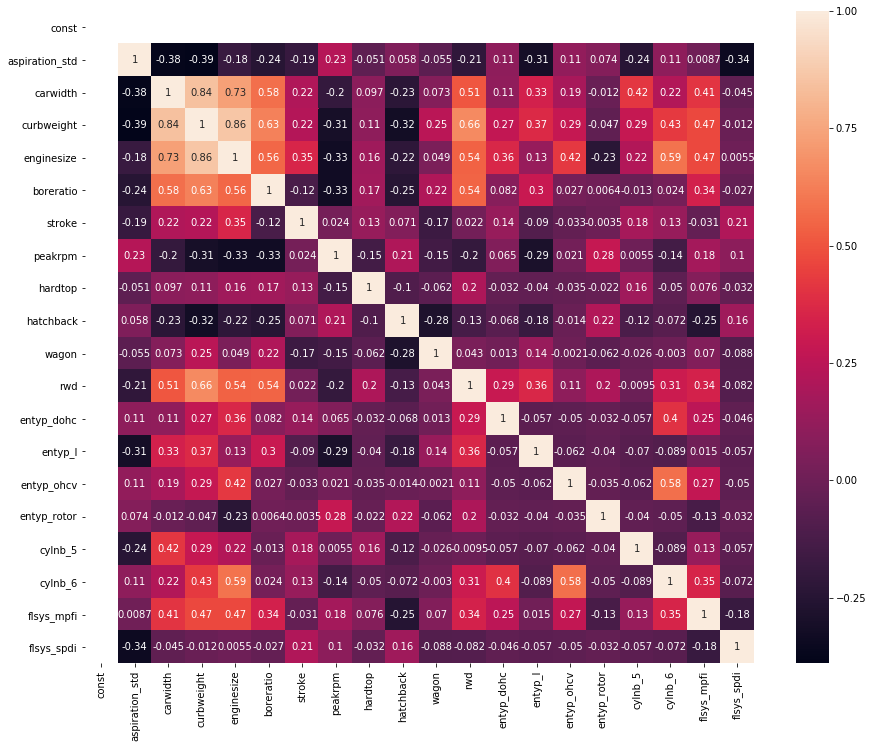

In [1654]:
# Check correlation matrix at this time
plt.figure(figsize = (15,12))     # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

In [1655]:
# Drop wagon next
X_train = X_train.drop('wagon', 1)
# Create a 26th fitted model
lm_26 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     92.28
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.15e-60
Time:                        21:54:43   Log-Likelihood:                -1.0032
No. Observations:                 137   AIC:                             40.01
Df Residuals:                     118   BIC:                             95.49
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0347      0.023     -1.

In [1657]:
# Calculate Vif
vif_cal(input_data=car_data.drop(['wagon','sbl_risk-1','fueltype_gas','sbl_risk2','flsys_1bbl','door_four','sbl_risk1',
                                  'carheight','entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase','highwaympg',
                                  'sbl_risk3','carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc',
                                  'cylnb_2','flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
3       enginesize  14.00
2       curbweight  13.26
1         carwidth   5.29
4        boreratio   3.07
15         cylnb_6   2.93
9              rwd   2.66
16      flsys_mpfi   1.98
12      entyp_ohcv   1.98
0   aspiration_std   1.91
13     entyp_rotor   1.87
14         cylnb_5   1.82
11         entyp_l   1.77
5           stroke   1.62
6          peakrpm   1.58
17      flsys_spdi   1.56
10      entyp_dohc   1.52
7          hardtop   1.34
8        hatchback   1.31

In [1658]:
# Remove cylnb_5 next
X_train = X_train.drop('cylnb_5', 1)
# Create a 27th fitted model
lm_27 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     96.78
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           3.06e-61
Time:                        21:57:02   Log-Likelihood:                -2.1518
No. Observations:                 137   AIC:                             40.30
Df Residuals:                     119   BIC:                             92.86
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0365      0.023     -1.

In [1659]:
# Calculate Vif
vif_cal(input_data=car_data.drop(['cylnb_5','wagon','sbl_risk-1','fueltype_gas','sbl_risk2','flsys_1bbl','door_four',
                                  'sbl_risk1','carheight','entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase',
                                  'highwaympg','sbl_risk3','carlength','cylnb_4','fwd','citympg','compressionratio',
                                  'entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
3       enginesize  13.95
2       curbweight  13.02
1         carwidth   4.84
14         cylnb_6   2.85
4        boreratio   2.74
9              rwd   2.62
15      flsys_mpfi   1.97
12      entyp_ohcv   1.89
0   aspiration_std   1.88
13     entyp_rotor   1.87
11         entyp_l   1.64
5           stroke   1.61
6          peakrpm   1.56
16      flsys_spdi   1.53
10      entyp_dohc   1.50
7          hardtop   1.31
8        hatchback   1.31

In [1660]:
# drop flsys_mpfi next
X_train = X_train.drop('flsys_mpfi', 1)
# Create a 28th fitted model
lm_28 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     102.9
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           4.52e-62
Time:                        21:58:59   Log-Likelihood:                -2.6429
No. Observations:                 137   AIC:                             39.29
Df Residuals:                     120   BIC:                             88.93
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0378      0.023     -1.

In [1661]:
# Calculate Vif
vif_cal(input_data=car_data.drop(['flsys_mpfi','cylnb_5','wagon','sbl_risk-1','fueltype_gas','sbl_risk2','flsys_1bbl',
                                  'door_four','sbl_risk1','carheight','entyp_ohcf','sedan','horsepower','sbl_risk0',
                                  'wheelbase','highwaympg','sbl_risk3','carlength','cylnb_4','fwd','citympg',
                                  'compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], axis=1), 
                                   dependent_col="price")

Var    Vif
3       enginesize  13.86
2       curbweight  12.66
1         carwidth   4.78
14         cylnb_6   2.82
4        boreratio   2.64
9              rwd   2.61
12      entyp_ohcv   1.88
0   aspiration_std   1.85
13     entyp_rotor   1.80
11         entyp_l   1.62
5           stroke   1.60
15      flsys_spdi   1.50
10      entyp_dohc   1.48
6          peakrpm   1.37
7          hardtop   1.31
8        hatchback   1.31

In [1662]:
# Remove aspiration_std next
X_train = X_train.drop('aspiration_std', 1)
# Create a 29th fitted model
lm_29 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     98.55
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           2.69e-60
Time:                        22:01:14   Log-Likelihood:                -10.018
No. Observations:                 137   AIC:                             52.04
Df Residuals:                     121   BIC:                             98.76
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0391      0.024     -1.628      

In [1663]:
# calculate Vif
vif_cal(input_data=car_data.drop(['aspiration_std','flsys_mpfi','cylnb_5','wagon','sbl_risk-1','fueltype_gas',
                                  'sbl_risk2','flsys_1bbl','door_four','sbl_risk1','carheight','entyp_ohcf','sedan',
                                  'horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3','carlength','cylnb_4',
                                  'fwd','citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'],
                                 axis=1), dependent_col="price")

Var    Vif
2    enginesize  12.03
1    curbweight  11.00
0      carwidth   4.73
13      cylnb_6   2.81
3     boreratio   2.62
8           rwd   2.60
11   entyp_ohcv   1.88
12  entyp_rotor   1.71
10      entyp_l   1.61
4        stroke   1.55
9    entyp_dohc   1.48
5       peakrpm   1.34
6       hardtop   1.29
7     hatchback   1.29
14   flsys_spdi   1.24

In [1664]:
# remove flsys_spdi because of high p value
X_train = X_train.drop('flsys_spdi', 1)
# Create a 30th fitted model
lm_30 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     105.8
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           3.65e-61
Time:                        22:04:39   Log-Likelihood:                -10.422
No. Observations:                 137   AIC:                             50.84
Df Residuals:                     122   BIC:                             94.64
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0388      0.024     -1.618      

In [1665]:
# Calculate Vif
vif_cal(input_data=car_data.drop(['flsys_spdi','aspiration_std','flsys_mpfi','cylnb_5','wagon','sbl_risk-1',
                                  'fueltype_gas','sbl_risk2','flsys_1bbl','door_four','sbl_risk1','carheight',
                                  'entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3',
                                  'carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc','cylnb_2',
                                  'flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
2    enginesize  12.02
1    curbweight  10.65
0      carwidth   4.50
13      cylnb_6   2.79
3     boreratio   2.61
8           rwd   2.55
11   entyp_ohcv   1.88
12  entyp_rotor   1.70
10      entyp_l   1.61
4        stroke   1.48
9    entyp_dohc   1.46
5       peakrpm   1.31
6       hardtop   1.28
7     hatchback   1.22

In [1666]:
# remove peakrpm next
X_train = X_train.drop('peakrpm', 1)
# Create a 31st fitted model
lm_31 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     110.7
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           2.70e-61
Time:                        22:06:16   Log-Likelihood:                -12.767
No. Observations:                 137   AIC:                             53.53
Df Residuals:                     123   BIC:                             94.41
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0410      0.024     -1.687      

In [1667]:
# calculate Vif
vif_cal(input_data=car_data.drop(['peakrpm','flsys_spdi','aspiration_std','flsys_mpfi','cylnb_5','wagon','sbl_risk-1',
                                  'fueltype_gas','sbl_risk2','flsys_1bbl','door_four','sbl_risk1','carheight',
                                  'entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3',
                                  'carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc','cylnb_2',
                                  'flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var    Vif
2    enginesize  11.90
1    curbweight  10.57
0      carwidth   4.44
12      cylnb_6   2.79
3     boreratio   2.59
7           rwd   2.54
10   entyp_ohcv   1.85
11  entyp_rotor   1.66
9       entyp_l   1.58
4        stroke   1.48
8    entyp_dohc   1.39
5       hardtop   1.27
6     hatchback   1.22

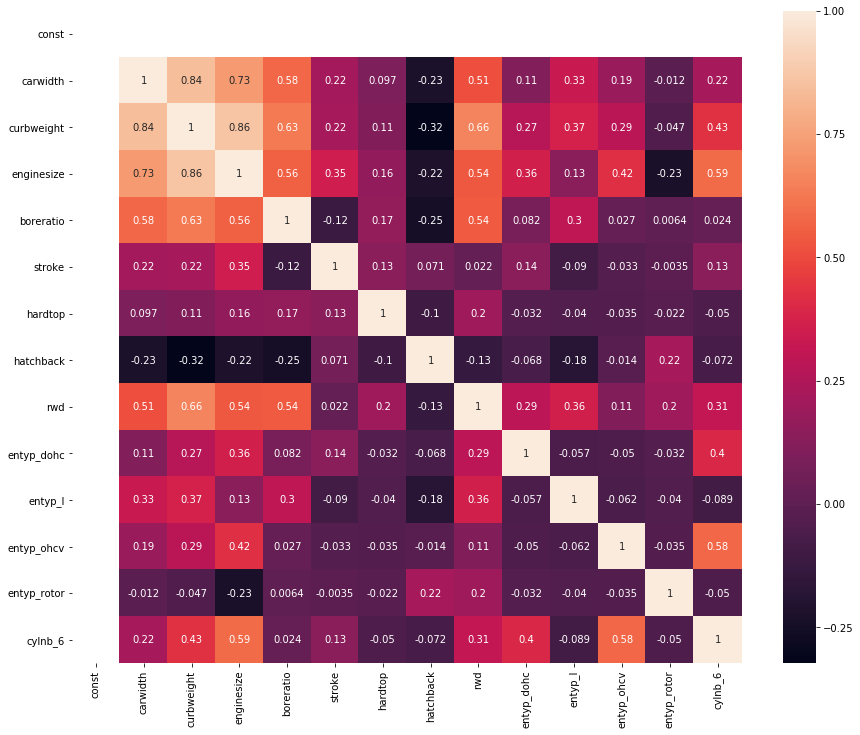

In [1668]:
# Check the correlation matrix again
plt.figure(figsize = (15,12))     # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

In [1669]:
# Remove 'entyp_rotor','hatchback' next
X_train = X_train.drop(['entyp_rotor','hatchback'], 1)
# Create a 32nd fitted model
lm_32 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           4.19e-59
Time:                        22:08:12   Log-Likelihood:                -23.732
No. Observations:                 137   AIC:                             71.46
Df Residuals:                     125   BIC:                             106.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0402      0.026     -1.543      0.1

In [1670]:
# calculate Vif
vif_cal(input_data=car_data.drop(['entyp_rotor','hatchback','peakrpm','flsys_spdi','aspiration_std','flsys_mpfi',
                                  'cylnb_5','wagon','sbl_risk-1','fueltype_gas','sbl_risk2','flsys_1bbl','door_four',
                                  'sbl_risk1','carheight','entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase',
                                  'highwaympg','sbl_risk3','carlength','cylnb_4','fwd','citympg','compressionratio',
                                  'entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var   Vif
1   curbweight  9.60
2   enginesize  8.39
0     carwidth  4.33
10     cylnb_6  2.66
3    boreratio  2.50
6          rwd  2.22
9   entyp_ohcv  1.79
8      entyp_l  1.46
4       stroke  1.38
7   entyp_dohc  1.38
5      hardtop  1.24

In [1671]:
# remove few other variables as they don't seem relevant
X_train = X_train.drop(['entyp_l','entyp_dohc','hardtop'], 1)
# Create a 33rd fitted model
lm_33 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     117.7
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           3.18e-55
Time:                        22:12:06   Log-Likelihood:                -41.413
No. Observations:                 137   AIC:                             100.8
Df Residuals:                     128   BIC:                             127.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0328      0.029     -1.126      0.2

In [1672]:
#calculate vif
vif_cal(input_data=car_data.drop(['entyp_l','entyp_dohc','hardtop','entyp_rotor','hatchback','peakrpm','flsys_spdi',
                                  'aspiration_std','flsys_mpfi','cylnb_5','wagon','sbl_risk-1','fueltype_gas',
                                  'sbl_risk2','flsys_1bbl','door_four','sbl_risk1','carheight','entyp_ohcf','sedan',
                                  'horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3','carlength','cylnb_4',
                                  'fwd','citympg','compressionratio','entyp_ohc','cylnb_2','flsys_2bbl','flsys_idi'],
                                 axis=1), dependent_col="price")

Var   Vif
1  curbweight  8.18
2  enginesize  7.14
0    carwidth  4.19
7     cylnb_6  2.56
3   boreratio  2.44
5         rwd  2.05
6  entyp_ohcv  1.56
4      stroke  1.36

In [1673]:
# cylnb_6 has high p value
X_train = X_train.drop(['cylnb_6'], 1)
# Create a 34th fitted model
lm_34 = sm.OLS(y_train,X_train).fit()
# summary of linear model
print(lm_34.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           3.46e-56
Time:                        22:15:15   Log-Likelihood:                -41.708
No. Observations:                 137   AIC:                             99.42
Df Residuals:                     129   BIC:                             122.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0331      0.029     -1.139      0.2

In [1674]:
# Calculate Vif
vif_cal(input_data=car_data.drop(['cylnb_6','entyp_l','entyp_dohc','hardtop','entyp_rotor','hatchback','peakrpm',
                                  'flsys_spdi','aspiration_std','flsys_mpfi','cylnb_5','wagon','sbl_risk-1',
                                  'fueltype_gas','sbl_risk2','flsys_1bbl','door_four','sbl_risk1','carheight',
                                  'entyp_ohcf','sedan','horsepower','sbl_risk0','wheelbase','highwaympg','sbl_risk3',
                                  'carlength','cylnb_4','fwd','citympg','compressionratio','entyp_ohc','cylnb_2',
                                  'flsys_2bbl','flsys_idi'], axis=1), dependent_col="price")

Var   Vif
1  curbweight  8.17
2  enginesize  5.06
0    carwidth  3.78
3   boreratio  2.09
5         rwd  1.97
6  entyp_ohcv  1.48
4      stroke  1.32

## Step 8. Prediction with Model 34

In [1677]:
# Adding  constant variable to test dataframe
X_test_m34 = sm.add_constant(X_test)

In [1678]:
#Creating X_test_m34 dataframe by dropping variables from X_test_m34
X_test_m34 = X_test_m34.drop(['fueltype_gas', 'aspiration_std', 'door_four', 'wheelbase','carlength', 'carheight',
                              'compressionratio', 'horsepower', 'peakrpm','citympg', 'highwaympg', 'sbl_risk-1', 
                              'sbl_risk0','sbl_risk1', 'sbl_risk2', 'sbl_risk3', 'hardtop', 'hatchback', 'sedan',
                              'wagon', 'fwd', 'entyp_dohc', 'entyp_l', 'entyp_ohc','entyp_ohcf', 'entyp_rotor', 
                              'cylnb_5', 'cylnb_4','cylnb_6', 'cylnb_2', 'flsys_1bbl', 'flsys_2bbl', 'flsys_idi',
                              'flsys_mpfi', 'flsys_spdi'], axis=1)

In [1680]:
# Making predictions
y_pred_m34 = lm_34.predict(X_test_m34)

Text(0,0.5,'Car Price')

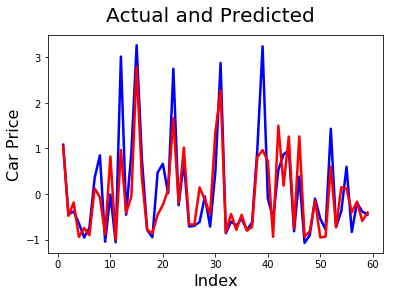

In [1681]:
# Plot Actual vs Predicted
c = [i for i in range(1,60,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m34, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Car Price', fontsize=16)                           # Y-label

Text(0,0.5,'y_pred')

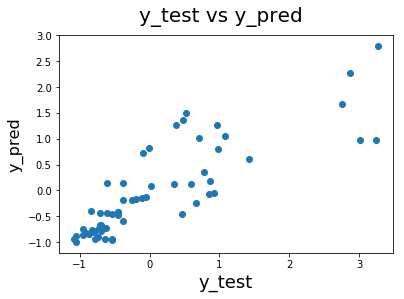

In [1683]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m34)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

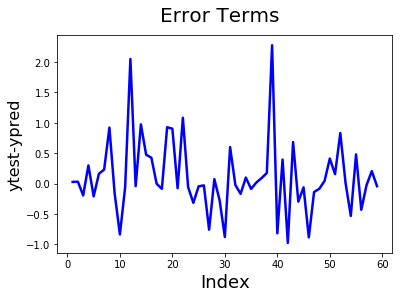

In [1684]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,60,1)]
plt.plot(c,y_test-y_pred_m34, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

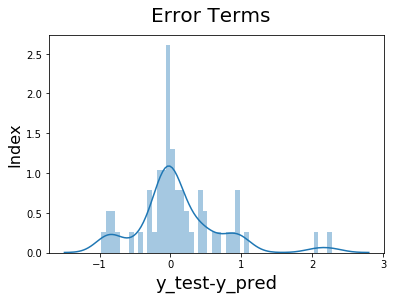

In [1685]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m34),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [1686]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m29)))

RMSE : 0.72290711625


# Step 9. Conclusion

## Following variables found to be significant in predicting the price of a car-
###  Enginesize, Curbweight, Carwidth, Boreratio, Drivewheel, Enginetype, Stroke, Cylinder number, Wheelbase 




### These variables describe the price of a car well with R-Squared and adjusted R-squared values pretty close (0.88 and 0.87 respectively), p values close to 0.00 and VIF values < 10.

### The predicted values using test data overlaps the train data very well and the error distribution follows the Gaussian distribution.